## ASSIGNMENT 1
#### Shreeya Chitnis 

In [1]:
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import PyPDF2

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cshre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cshre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cshre\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

The first text talks about plagarism charges against Harvard Universirty President Claudine Gay. The critics compare the similarities in her work and the work of other scholars and raise questions about academic integrity. 
The second article talks about Claudine Gay intending to submit edits to her dissertation amidst the allegations of plagarism. 

In [2]:
pdf_file1 = r"C:\Users\cshre\OneDrive - Babson College\Shreeya\Semester 2\Advanced Programming\Advanced_Programming\data\foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf"
pdf_file2 = r"C:\Users\cshre\OneDrive - Babson College\Shreeya\Semester 2\Advanced Programming\Advanced_Programming\data\reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf"



In [3]:
text1 = ""
with open(pdf_file1, 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    num_pages = len(reader.pages)
    for page_num in range(num_pages):
        page = reader.pages[page_num]
        text1 += page.extract_text()
        
print("Text extracted from file1.pdf:")
print(text1)

Text extracted from file1.pdf:
1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the

In [4]:
text2 = ""
with open(pdf_file2, 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    num_pages = len(reader.pages)
    for page_num in range(num_pages):
        page = reader.pages[page_num]
        text2 += page.extract_text()

print("\nText extracted from file2.pdf:")
print(text2)


Text extracted from file2.pdf:
1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken
Cedeno/File Photo Acquire Licensing Rights
Dec 21 (Reuters) - Harvard University's president was planning to submit three corrections to
her 1997 dissertation after a committee investigating plagiarism allegations against her found
that she had made citation errors, a university spokesperson said.
Claudine Gay , who was inaugurated as Harvard's president in September , has already
submitted corrections to two published articles in recent weeks that were the focus of a
review by the Harvard Corporation

No anomalities observed in the text


In [5]:
# Sentiment Analysis Process 

sid = SentimentIntensityAnalyzer()

# Analyze sentiment for the first article
scores1 = sid.polarity_scores(text1)
print("Sentiment analysis for file1.pdf:")
print(scores1)

# Analyze sentiment for the second article
scores2 = sid.polarity_scores(text2)
print("\nSentiment analysis for file2.pdf:")
print(scores2)


Sentiment analysis for file1.pdf:
{'neg': 0.065, 'neu': 0.866, 'pos': 0.07, 'compound': 0.7243}

Sentiment analysis for file2.pdf:
{'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}


According to me, the first article has a slight negative sentiment and the second article feels like it has a neutral sentiment 
which is not what I observe in the results. According to the sentiment analysis, the first article has a relatively positive sentiment and the second article has a negative sentiment. 

In [8]:
lines1= text1.split('\n')

# The headline consists of the first two lines of the text
headline1 = "\n".join(lines1[:2])

# Print the extracted headline
print("Headline 1:", headline1)

lines2 = text2.split('\n')

# The headline consists of the first two lines of the text
headline2 = "\n".join(lines2[:2])
print("Headline 2:", headline2)



# Perform sentiment analysis on the headlines
scores1 = sid.polarity_scores(headline1)
scores2 = sid.polarity_scores(headline2)

# Print sentiment analysis results for the first headline
print("Sentiment analysis for headline 1:")
print(scores1)

# Print sentiment analysis results for the second headline
print("\nSentiment analysis for headline 2:")
print(scores2)


Headline 1: 1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
Headline 2: 1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
Sentiment analysis for headline 1:
{'neg': 0.178, 'neu': 0.822, 'pos': 0.0, 'compound': -0.3353}

Sentiment analysis for headline 2:
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


These results do not agree with the overall sentiment calculated above but agree with the initial hypothesis. 


In [11]:
# using py readability metrics
from readability import Readability

def calculate_readability_scores(text):

    readability = Readability(text)

    # Calculate readability scores
    scores = {
        'flesch_kincaid_grade': readability.flesch_kincaid().score,
        'gunning_fog_index': readability.gunning_fog().score,
        'coleman_liau_index': readability.coleman_liau().score
    }

    return scores

def print_readability_scores(scores):
    print("Readability Scores:")
    print("-------------------")
    for metric, score in scores.items():
        print(f"{metric.capitalize()}: {score}")


scores1 = calculate_readability_scores(text1)
print_readability_scores(scores1)

scores2 = calculate_readability_scores(text2)
print_readability_scores(scores2)



Readability Scores:
-------------------
Flesch_kincaid_grade: 19.21912993097889
Gunning_fog_index: 21.868487077434633
Coleman_liau_index: 13.410706836616448
Readability Scores:
-------------------
Flesch_kincaid_grade: 18.706800340389325
Gunning_fog_index: 19.59404318689501
Coleman_liau_index: 15.241952983725135


Flesch-Kincaid Grade Level measures the readability of the text by estimating the U.S. grade level needed to understand the text.
Gunning Fog Index estimates the years of formal education required to understand the text on the first reading.
Coleman-Liau Index computes the grade level of the text by considering characters per word and words per sentence.

The first article is graded to read by someone above 17(Flesch-Kincaid Grade Level), someone with 21 years of formal education, 13 grade level according to Coleman Liau index.
The second article is graded to read by someone above 17(Flesch-Kincaid Grade Level), someone with 19 years of formal education, 15 grade level according to Coleman Liau index


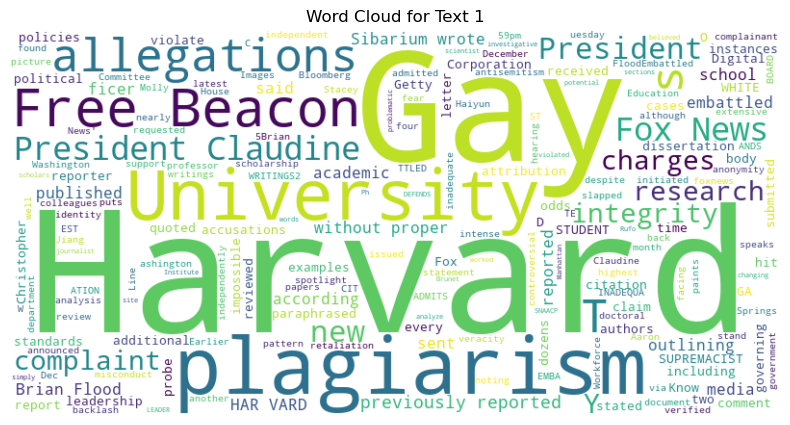

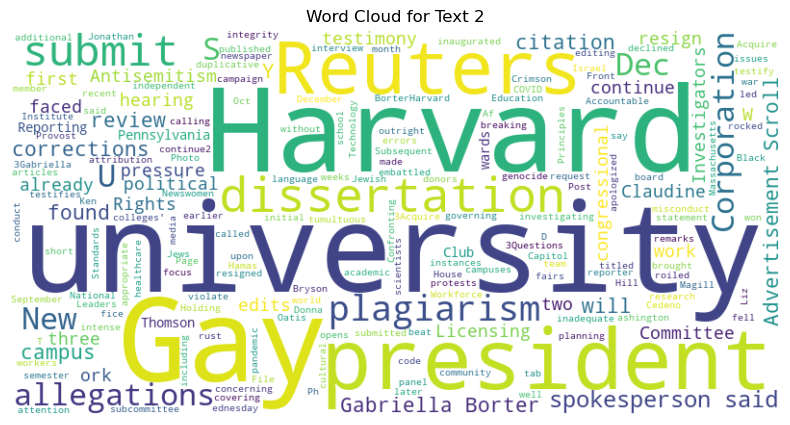

In [10]:
#wordclouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word cloud for the first text
generate_wordcloud(text1, "Word Cloud for Text 1")

# Generate word cloud for the second text
generate_wordcloud(text2, "Word Cloud for Text 2")


The first word cloud prominently features the words- Harvard, universtiy, Gay, plagarism whereas the second word cloud features Harvard, universtiy, Gay, plagarism, submit, dissertation.  